<a href="https://colab.research.google.com/github/abhisekkundu-DS/deep_learning/blob/main/dog_cate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
! pip install opendatasets

In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhisekkundu00
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:07<00:00, 150MB/s] 


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
#grnerators
train_ds=keras.utils.image_dataset_from_directory(
    directory ='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory ='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [8]:
#Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
#Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model_history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.9763 - loss: 0.0642 - val_accuracy: 0.7031 - val_loss: 1.2345
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 92s 328ms/step - accuracy: 0.9819 - loss: 0.0566 - val_accuracy: 0.7184 - val_loss: 1.2295
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 229ms/step - accuracy: 0.9788 - loss: 0.0517 - val_accuracy: 0.7285 - val_loss: 1.4286
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.9754 - loss: 0.0568 - val_accuracy: 0.6816 - val_loss: 1.7616
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 327ms/step - accuracy: 0.9699 - loss: 0.0793 - val_accuracy: 0.6866 - val_loss: 1.7471
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 222ms/step - accuracy: 0.9637 - loss: 0.1073 - val_accuracy: 0.7015 - val_loss: 1.6426
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 228ms/step - accuracy: 0.9699 - loss: 0.0858 - val_accuracy: 0.7357 - val_loss: 1.3493
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 328ms/step - accuracy: 0.9795 - loss: 0

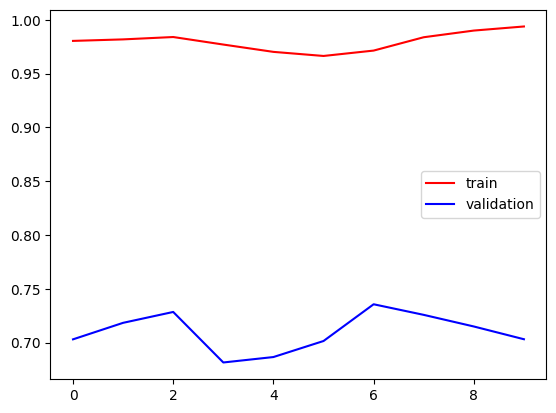

In [27]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'],color='red',label='train')
plt.plot(model_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [33]:
#Create CNN Model
modell = Sequential()
modell.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
modell.add(BatchNormalization())
modell.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

modell.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
modell.add(BatchNormalization())
modell.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


modell.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
modell.add(BatchNormalization())
modell.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

modell.add(Flatten())

modell.add(Dense(128,activation='relu'))
modell.add(Dense(64,activation='relu'))
modell.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
modell.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history=modell.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.5730 - loss: 2.7332 - val_accuracy: 0.5351 - val_loss: 1.4746
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 333ms/step - accuracy: 0.6757 - loss: 0.6739 - val_accuracy: 0.6053 - val_loss: 0.8981
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 223ms/step - accuracy: 0.7545 - loss: 0.5328 - val_accuracy: 0.6902 - val_loss: 0.6384
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 223ms/step - accuracy: 0.7836 - loss: 0.4933 - val_accuracy: 0.6855 - val_loss: 0.7551
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 328ms/step - accuracy: 0.8270 - loss: 0.4464 - val_accuracy: 0.6424 - val_loss: 1.7194
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.8363 - loss: 0.3896 - val_accuracy: 0.7212 - val_loss: 0.7284
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.9033 - loss: 0.2393 - val_accuracy: 0.7074 - val_loss: 1.1979
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 328ms/step - accuracy: 0.9529 - loss: 0

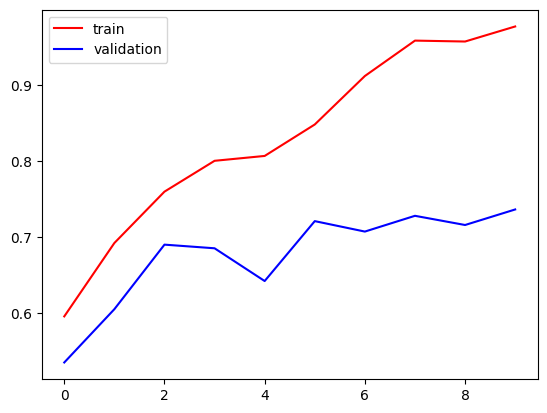

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [37]:
import cv2

In [81]:
test_img = cv2.imread("/content/premium_photo-1694819488591-a43907d1c5cc.jpg")

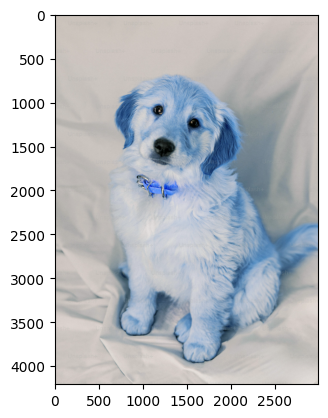

In [82]:
plt.imshow(test_img)

In [83]:
test_img.shape

(4206, 3000, 3)

In [84]:
test_img = cv2.resize(test_img,(256,256))

In [85]:
test_input = test_img.reshape((1,256,256,3))